In [ ]:
# NB/ RF and stock trend

# RF and time series 

In [212]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error 

## Time Series PLot 

In [86]:
tsd = pd.read_csv('5y_time_series.csv')
td = tsd[tsd.columns[1:]]
td.head()

,Name,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,...,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11
0,A,40.380000,40.490000,40.480000,37.150000,37.220000,36.680000,37.130000,37.460000,37.470000,...,59.79,59.94,60.20,60.37,60.13,60.87,60.14,59.68,58.57,59.33
1,AAL,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,...,50.44,51.06,50.45,50.55,50.80,50.58,50.00,49.40,48.55,48.35
2,AAP,69.110000,70.670000,71.300000,72.460000,72.870000,71.580000,72.000000,72.200000,71.960000,...,112.01,114.05,114.48,110.53,111.01,109.49,109.39,109.18,106.13,107.34
3,AAPL,90.000000,90.240000,90.120000,90.910000,92.590000,95.020000,93.720000,95.550000,94.660000,...,148.73,150.05,157.14,155.57,156.39,158.81,160.08,161.06,155.32,157.48
4,ABBV,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,...,69.91,70.38,70.71,70.99,70.99,71.22,71.47,72.02,70.44,70.63


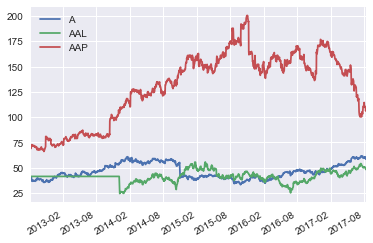

In [145]:
some = pd.DataFrame(np.array(td.iloc[:3][td.columns[1:]].T), index = pd.to_datetime(td.columns[1:]), columns = list(td['Name'][:3]) )

# some = some.cumsum()

fig = plt.figure(figsize = (7, 7))
some.plot()
plt.legend(loc = 'best')

## Classification 

In [46]:
full = pd.read_csv('all_stocks_5yr.csv')
full.head()

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [47]:
# print (full['Date'].unique().shape)

cut = full[['Date', 'Close', 'Name']]
cut.head()

,Date,Close,Name
0,2012-08-13,92.40,MMM
1,2012-08-14,92.30,MMM
2,2012-08-15,92.54,MMM
3,2012-08-16,93.74,MMM
4,2012-08-17,94.24,MMM


In [48]:
pivot = pd.pivot_table(cut, values = 'Close', columns = 'Date', index = 'Name').reset_index()
pivot.head()

Date,Name,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,...,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11
0,A,40.38,40.49,40.48,37.15,37.22,36.68,37.13,37.46,37.47,...,59.79,59.94,60.20,60.37,60.13,60.87,60.14,59.68,58.57,59.33
1,AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.44,51.06,50.45,50.55,50.80,50.58,50.00,49.40,48.55,48.35
2,AAP,69.11,70.67,71.30,72.46,72.87,71.58,72.00,72.20,71.96,...,112.01,114.05,114.48,110.53,111.01,109.49,109.39,109.18,106.13,107.34
3,AAPL,90.00,90.24,90.12,90.91,92.59,95.02,93.72,95.55,94.66,...,148.73,150.05,157.14,155.57,156.39,158.81,160.08,161.06,155.32,157.48
4,ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.91,70.38,70.71,70.99,70.99,71.22,71.47,72.02,70.44,70.63


In [159]:
# replace NaN with row average

ref = pivot.T.fillna(pivot.mean(axis = 1)).T
ref.head()

Date,Name,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,...,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11
0,A,40.38,40.49,40.48,37.15,37.22,36.68,37.13,37.46,37.47,...,59.79,59.94,60.2,60.37,60.13,60.87,60.14,59.68,58.57,59.33
1,AAL,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,...,50.44,51.06,50.45,50.55,50.8,50.58,50,49.4,48.55,48.35
2,AAP,69.11,70.67,71.3,72.46,72.87,71.58,72,72.2,71.96,...,112.01,114.05,114.48,110.53,111.01,109.49,109.39,109.18,106.13,107.34
3,AAPL,90,90.24,90.12,90.91,92.59,95.02,93.72,95.55,94.66,...,148.73,150.05,157.14,155.57,156.39,158.81,160.08,161.06,155.32,157.48
4,ABBV,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,...,69.91,70.38,70.71,70.99,70.99,71.22,71.47,72.02,70.44,70.63


In [160]:
# the goal is to predict the trend of closing stock price on 2017-08-11, comparing with that on 2017-08-10

# features are stored in x
x = ref[ref.columns[1:-1]]

ref['Label'] = np.nan

In [161]:
# 8-11
aug11 = ref.iloc[:, -2]

# 8-10
aug10 = ref.iloc[:, -3]


# now label 1 as long as stock price increases from aug 10th to aug 11th 
# and 0 for decreasing stock price

desired_percentage = 0 

for i in range(len(aug10)):
    if (aug11[i] - aug10[i])/ aug10[i] > desired_percentage:
        ref['Label'].replace([i], 1)
    else:
        ref['Label'].replace([i], 0)

In [165]:

desired_percentage = 0 

for i in range(len(aug10)):
    if (aug11[i] - aug10[i])/ aug10[i] > desired_percentage:
        ref['Label'][i] = 1
    else:
        ref['Label'][i] = 0
        

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
ref.head()

Date,Name,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,...,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,Label
0,A,40.38,40.49,40.48,37.15,37.22,36.68,37.13,37.46,37.47,...,59.94,60.2,60.37,60.13,60.87,60.14,59.68,58.57,59.33,1.0
1,AAL,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,41.5096,...,51.06,50.45,50.55,50.8,50.58,50,49.4,48.55,48.35,0.0
2,AAP,69.11,70.67,71.3,72.46,72.87,71.58,72,72.2,71.96,...,114.05,114.48,110.53,111.01,109.49,109.39,109.18,106.13,107.34,1.0
3,AAPL,90,90.24,90.12,90.91,92.59,95.02,93.72,95.55,94.66,...,150.05,157.14,155.57,156.39,158.81,160.08,161.06,155.32,157.48,1.0
4,ABBV,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,56.6296,...,70.38,70.71,70.99,70.99,71.22,71.47,72.02,70.44,70.63,1.0


In [173]:
# check if the classes are balanced 

In [183]:
print (sum(y == 1))
print (sum(y == 0))

241
262


##  Naive Bayes Classifier 

In [171]:
y = ref['Label']

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [185]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [189]:
sum(gnb.predict(x_test) == y_test)

61

In [191]:
accuracy_rate = make_scorer(accuracy_score)

scores = cross_val_score(gnb, x, y, cv = 10, scoring = accuracy_rate)

In [194]:
print (scores)

np.mean(scores)

[ 0.59615385  0.64705882  0.56        0.5         0.54        0.48        0.52
  0.54        0.46        0.48      ]


0.53232126696832582

## Random Forest Classifier 

In [197]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

clf.predict(x_test)

array([ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.])

In [198]:
accuracy_rate = make_scorer(accuracy_score)

scores = cross_val_score(clf, x, y, cv = 10, scoring = accuracy_rate)

In [199]:
print (scores)

np.mean(scores)

[ 0.53846154  0.62745098  0.58        0.58        0.64        0.46        0.52
  0.64        0.66        0.5       ]


0.57459125188536952

## Random Forest Regressor 

In [201]:
td.head()

,Name,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,...,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11
0,A,40.380000,40.490000,40.480000,37.150000,37.220000,36.680000,37.130000,37.460000,37.470000,...,59.79,59.94,60.20,60.37,60.13,60.87,60.14,59.68,58.57,59.33
1,AAL,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,41.509644,...,50.44,51.06,50.45,50.55,50.80,50.58,50.00,49.40,48.55,48.35
2,AAP,69.110000,70.670000,71.300000,72.460000,72.870000,71.580000,72.000000,72.200000,71.960000,...,112.01,114.05,114.48,110.53,111.01,109.49,109.39,109.18,106.13,107.34
3,AAPL,90.000000,90.240000,90.120000,90.910000,92.590000,95.020000,93.720000,95.550000,94.660000,...,148.73,150.05,157.14,155.57,156.39,158.81,160.08,161.06,155.32,157.48
4,ABBV,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,56.629558,...,69.91,70.38,70.71,70.99,70.99,71.22,71.47,72.02,70.44,70.63


In [248]:
# predict price on Aug. 11th from all the past data

yrf = td[td.columns[-1]]

xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x, yrf, test_size = 0.2, random_state = 1)


In [249]:
rf = RandomForestRegressor()

rf.fit(xrf_train, yrf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [267]:
mse = make_scorer(mean_squared_error)

scores = cross_val_score(rf, x, yrf, cv = 10, scoring = mse)

print (scores)
print (np.mean(scores))

[  1.39450346e+03   2.05876093e+03   1.01384325e+03   1.79697366e+01
   2.39138049e+01   3.25763272e+02   8.12254425e+02   1.65275104e+04
   2.33090934e+00   4.14081545e+01]
2221.82583338


In [262]:
# rf regression to binary result validation 
# prediciton is for aug.11th

# prediction using xrf_test
rfp = rf.predict(xrf_test)

aug10_test = xrf_test[xrf_test.columns[-1]]


pos = []
neg = [] 

for i in range(len(rfp)):
    if (yrf[i] - aug10_test.iloc[i])/ (rfp[i] - aug10_test.iloc[i]) > 0:
        pos.append(aug10_test.index[i])
    else:
        neg.append(aug10_test.index[i])

        
# defiend accuracy 
print (len(pos)/ len(rfp))

print (len(neg)/ len(rfp))

0.504950495049505
0.49504950495049505


## Tuning RF Regessor 

In [258]:
# n_estimators is the number of  trees, max_features is the number of bagged features 

tuned =  RandomForestRegressor()

param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['sqrt', 420, 50]}

grid_search = GridSearchCV(tuned, param_grid, cv= 10, scoring = make_scorer(mean_squared_error))

grid_search.fit(xrf_train, yrf_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 500], 'max_features': ['sqrt', 420, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error), verbose=0)

In [259]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [261]:
best_tree = RandomForestRegressor(max_features = 'sqrt', n_estimators = 100)
best_tree.fit(xrf_train, yrf_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [268]:
scores = cross_val_score(best_tree, x, yrf, cv = 10, scoring = make_scorer(mean_squared_error))

print (scores)
print (np.mean(scores))

[  1.44218605e+03   2.05858767e+03   1.12588455e+03   2.43594307e+01
   1.20031139e+02   4.36551567e+02   7.36611579e+02   1.76043269e+04
   1.59538295e+01   6.07104048e+01]
2362.52031088


In [264]:
# rf regression to binary result validation 
# prediciton is for aug.11th

# prediction using xrf_test
rfp = best_tree.predict(xrf_test)

aug10_test = xrf_test[xrf_test.columns[-1]]


pos = []
neg = [] 

for i in range(len(rfp)):
    if (yrf[i] - aug10_test.iloc[i])/ (rfp[i] - aug10_test.iloc[i]) > 0:
        pos.append(aug10_test.index[i])
    else:
        neg.append(aug10_test.index[i])

        
# defiend accuracy 
print (len(pos)/ len(rfp))

print (len(neg)/ len(rfp))

0.5346534653465347
0.46534653465346537
